<a href="https://colab.research.google.com/github/Munirathinam-E/DSA-Problems-Using-C/blob/main/ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders graphviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import graphviz


In [5]:
from google.colab import files
uploaded = files.upload()



Saving car_evaluation.csv to car_evaluation (1).csv


In [8]:
df = pd.read_csv(io.BytesIO(uploaded['car_evaluation (1).csv']))
df.head()



,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
import os

# Rename the file to a simpler name
os.rename('car_evaluation (1).csv', 'car_evaluation.csv')

# Now read it
df = pd.read_csv('car_evaluation.csv')
df.head()


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [10]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.describe()


,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [11]:
X = df.drop("class", axis=1)  # Features
y = df["class"]  # Target variable


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (1381, 6)
X_test shape: (346, 6)


In [13]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


In [14]:
giniclf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
giniclf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [15]:
ypred = giniclf.predict(X_test)
ypredtrain = giniclf.predict(X_train)


In [16]:
print('Model accuracy score for test data (Gini Index): {:.4f}'.format(accuracy_score(y_test, ypred)))
print('Model accuracy score for training data (Gini Index): {:.4f}'.format(accuracy_score(y_train, ypredtrain)))


Model accuracy score for test data (Gini Index): 0.7890
Model accuracy score for training data (Gini Index): 0.8096


In [17]:
print('Training set score: {:.4f}'.format(giniclf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(giniclf.score(X_test, y_test)))


Training set score: 0.8096
Test set score: 0.7890


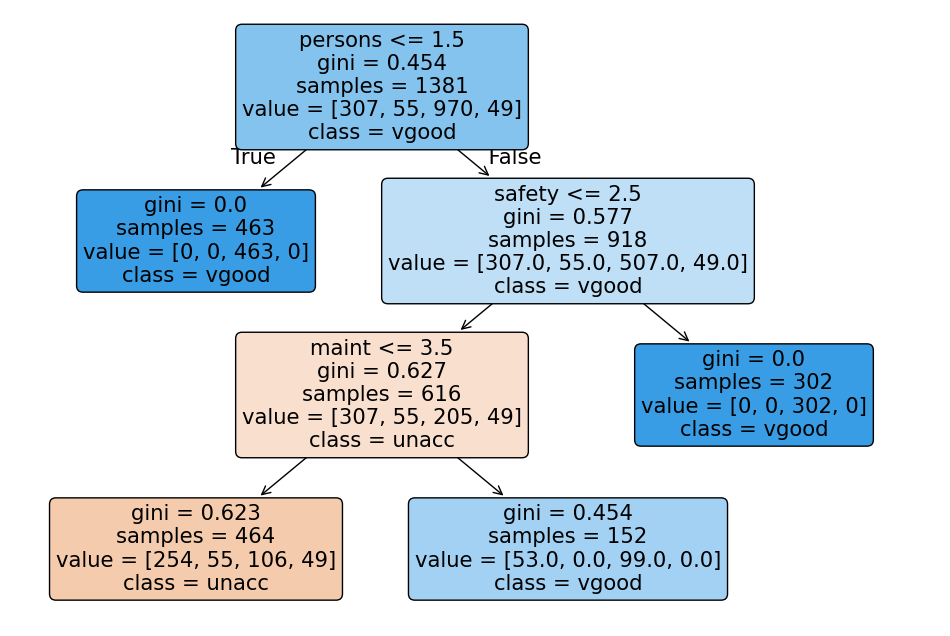

In [18]:
plt.figure(figsize=(12, 8))
tree.plot_tree(giniclf, feature_names=X_train.columns, class_names=y_train.unique(), filled=True, rounded=True)
plt.show()


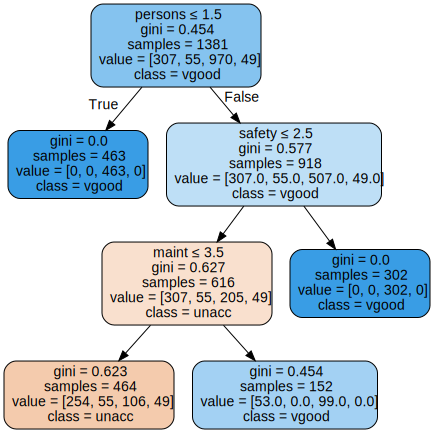

In [19]:
newtree = tree.export_graphviz(giniclf, out_file=None, feature_names=X_train.columns,
                               class_names=y_train.unique(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(newtree)
graph


In [20]:
enclf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
enclf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [21]:
ypreden = enclf.predict(X_test)
ypredten = enclf.predict(X_train)

print('Model accuracy for training data (Entropy): {:.4f}'.format(accuracy_score(y_train, ypredten)))
print('Model accuracy for test data (Entropy): {:.4f}'.format(accuracy_score(y_test, ypreden)))


Model accuracy for training data (Entropy): 0.8096
Model accuracy for test data (Entropy): 0.7890


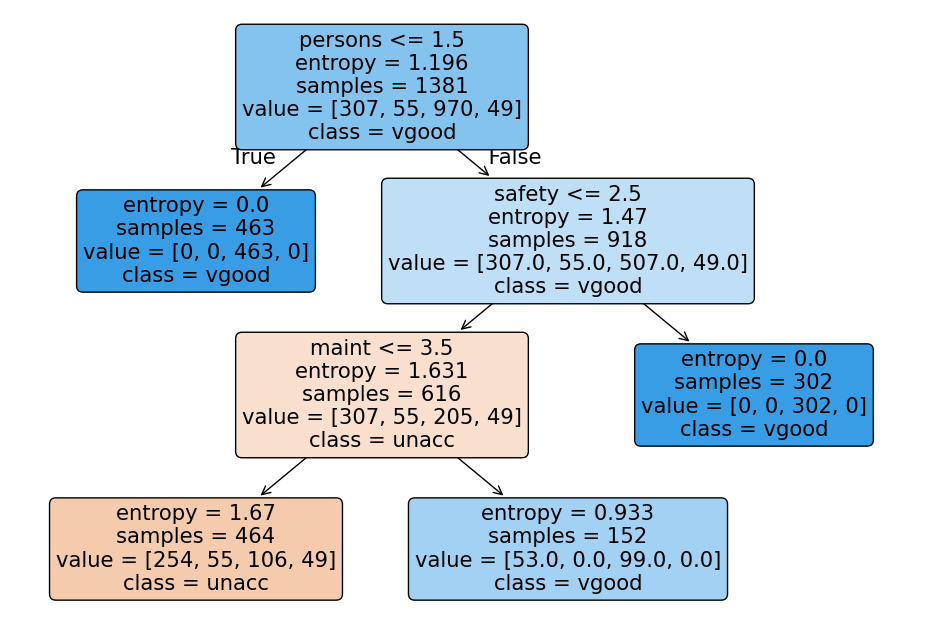

In [22]:
plt.figure(figsize=(12, 8))
tree.plot_tree(enclf, feature_names=X_train.columns, class_names=y_train.unique(), filled=True, rounded=True)
plt.show()


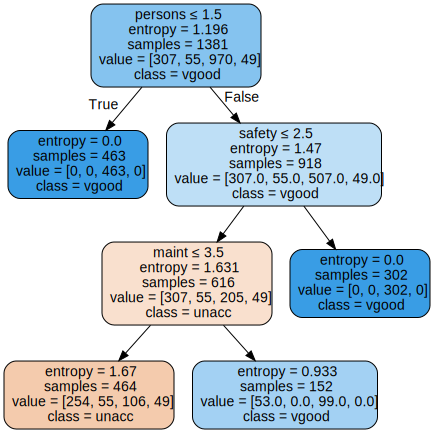

In [23]:
newtreeen = tree.export_graphviz(enclf, out_file=None, feature_names=X_train.columns,
                                 class_names=y_train.unique(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(newtreeen)
graph


In [24]:
cm = confusion_matrix(y_test, ypreden)
print('Confusion Matrix:\n', cm)


Confusion Matrix:
 [[ 58   0  19   0]
 [ 14   0   0   0]
 [ 24   0 215   0]
 [ 16   0   0   0]]
